### Importing required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.float_format = '{:.6f}'.format

from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

### Reading the dataset

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                 0.000000              0   
1               0                 0.000000              0   
2               0                 0.000000              0   
3               0                 0.000000              0   
4               0                 0.000000              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                0.000000               1                 0.000000   
1                0.000000               2                64.000000   
2                0.000000               1                 0.000000   
3                0.000000               2                 2.666667   
4                0.000000              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.200000   0.200000    0.000000    0.000000   Feb                 1   
1     0.000000   0.100000    0.000000    0.000000   Feb                 2   
2     0.200000   0.200000    0.000000    0.000000   Feb                 4   
3     0.050000   0.140000    0.000000    0.000000   Feb                 3   
4     0.020000   0.050000    0.000000    0.000000   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [4]:
df.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

### Understanding the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### changing the booleans to object

In [6]:
df['Weekend'] = df['Weekend'].astype('object')
df['Revenue'] = df['Revenue'].astype('object')

In [7]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

       BounceRates    ExitRates   PageValues   SpecialDay  OperatingSystems  \
count 12330.000000 12330.000000 12330.000000 12330.000000      12330.000000   
mean      0.022191     0.043073     5.889258     0.061427          2.124006   
std       0.048488     0.048597    18.568437     0.198917          0.911325   
min       0.000000     0.000000     0.000000     0.000000          1.000000   
25%       0.000000     0.014286     0.000000     0.000000          2.000000   
50%       0.003112     0.025156     0.000000     0.000000          2.000000   
75%       0.016813     0.050000     0.000000     0.000000          3.000000   
max       0.200000     0.200000   361.763742     1.000000          8.000000   

           Browser       Region  TrafficType  
count 12330.000000 12330.000000 12330.000000  
mean      2.357097     3.147364     4.069586  
std       1.717277     2.401591     4.025169  
min       1.000000     1.000000     1.000000  
25%       2.000000     1.000000     2.000000  
50%       2.000000     3.000000     2.000000  
75%       2.000000     4.000000     4.000000  
max      13.000000     9.000000    20.000000

### Null value Analysis

In [8]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
df_cat = df.select_dtypes(include = ['object'])
df_num = df.select_dtypes(include = ['number'])

### understanding categorical values

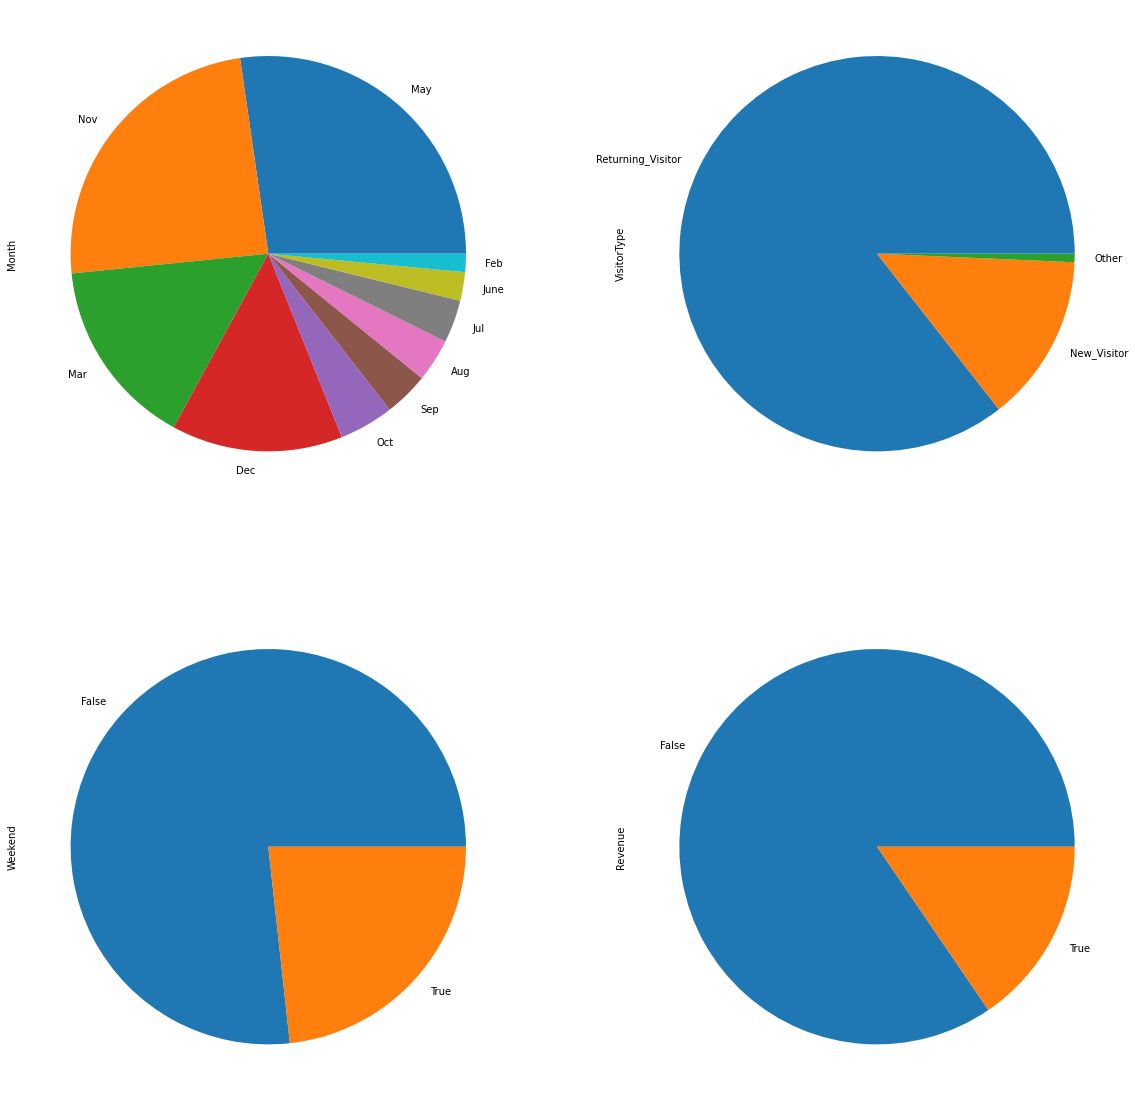

In [10]:
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 20))

for i, subplot in zip(df_cat.columns,  ax.flatten()):
    df_cat[i].value_counts().plot.pie(x=df_cat[i], ax = subplot)
plt.show()


### understandig Numerical variables

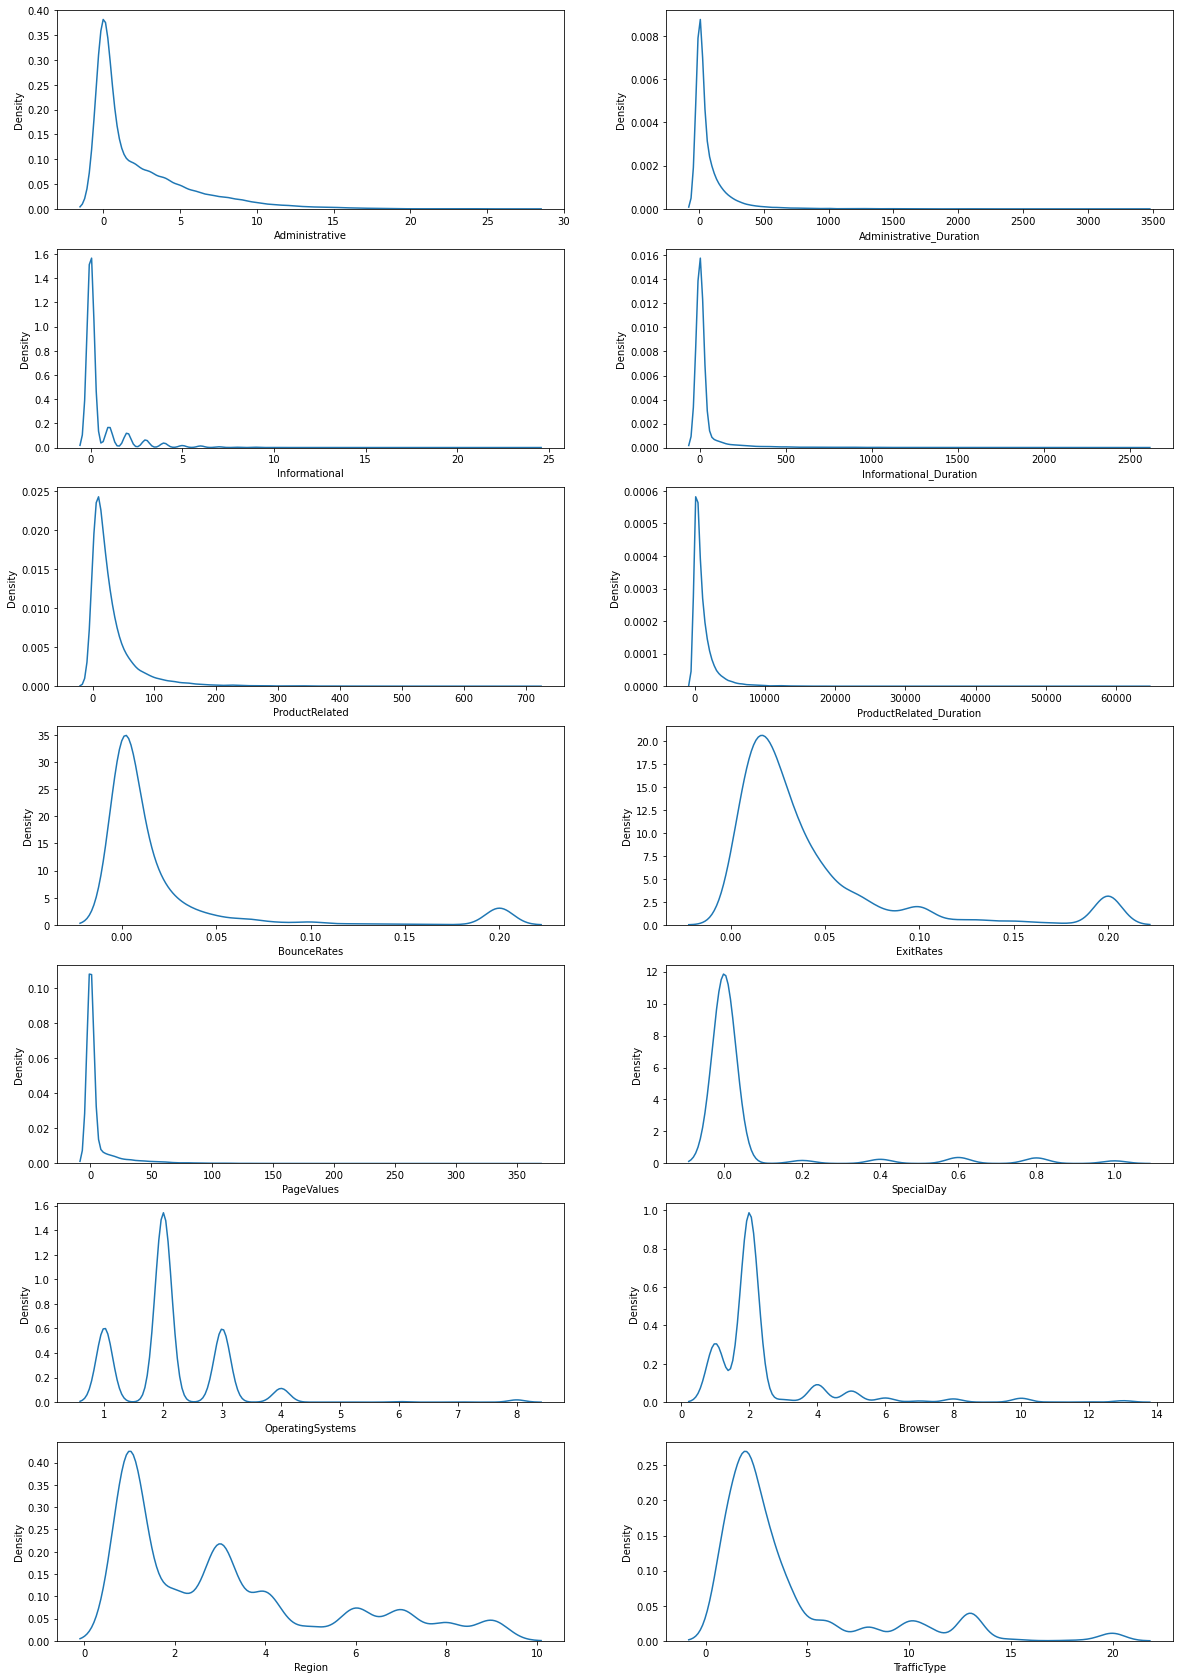

In [11]:
fig, ax = plt.subplots(nrows = 7, ncols= 2, figsize=(20, 30))

for i, subplot in zip(df_num.columns,  ax.flatten()):
    sns.kdeplot(df[i], ax=subplot)
plt.show()

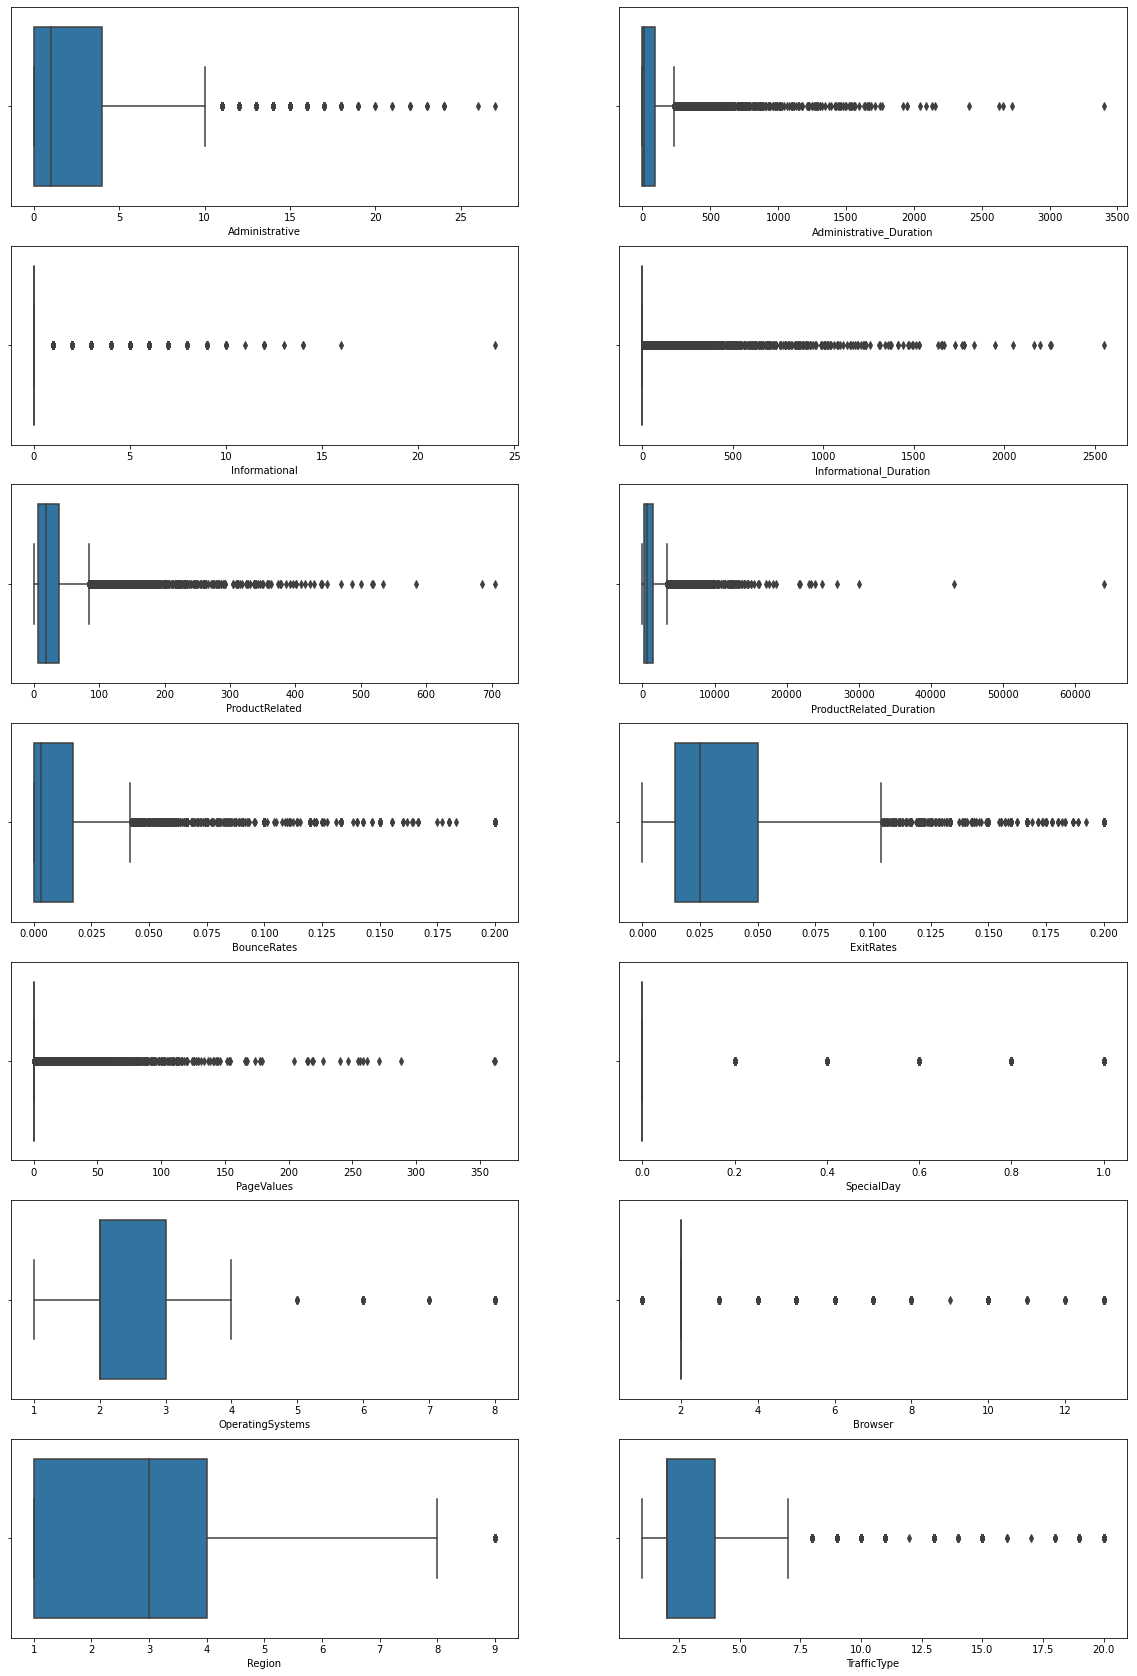

In [12]:
fig, ax = plt.subplots(nrows = 7, ncols= 2, figsize=(20, 30))

for i, subplot in zip(df_num.columns,  ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
plt.show()

### stanrdardizing the variables

In [13]:
df_num = df_num.apply(lambda rec:(rec - np.mean(rec) / np.std(rec)))
df_num.head()

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931        0.286512                -0.624348   
1               -0.244931        1.286512                63.375652   
2               -0.244931        0.286512                -0.624348   
3               -0.244931        1.286512                 2.042319   
4               -0.244931        9.286512               626.875652   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems   Browser  \
0    -0.257683  -0.686371   -0.317178   -0.308821         -1.330774 -0.372634   
1    -0.457683  -0.786371   -0.317178   -0.308821         -0.330774  0.627366   
2    -0.257683  -0.686371   -0.317178   -0.308821          1.669226 -0.372634   
3    -0.407683  -0.746371   -0.317178   -0.308821          0.669226  0.627366   
4    -0.437683  -0.836371   -0.317178   -0.308821          0.669226  1.627366   

     Region  TrafficType  
0 -0.310586    -0.011076  
1 -0.310586     0.988924  
2  7.689414     1.988924  
3  0.689414     2.988924  
4 -0.310586     2.988924

### Encoding categorical values

In [14]:
df_cat['Month'] = df_cat['Month'].replace(['Feb','Mar','May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep', 'Dec'],[2,3,5,0, 6,7,8,11,9,12])

In [15]:
df_cat['VisitorType'] = df_cat['VisitorType'].replace(['New_Visitor','Returning_Visitor', 'Other'],[0,1,2])

In [16]:
df_cat['Weekend'] = pd.get_dummies(df_cat['Weekend'],drop_first=True)
df_cat['Revenue'] = pd.get_dummies(df_cat['Revenue'],drop_first=True)

### Concating numerical and categrical variables

In [17]:
scaled = pd.concat([df_num, df_cat], axis=1)

In [18]:
scaled.head()

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931        0.286512                -0.624348   
1               -0.244931        1.286512                63.375652   
2               -0.244931        0.286512                -0.624348   
3               -0.244931        1.286512                 2.042319   
4               -0.244931        9.286512               626.875652   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems   Browser  \
0    -0.257683  -0.686371   -0.317178   -0.308821         -1.330774 -0.372634   
1    -0.457683  -0.786371   -0.317178   -0.308821         -0.330774  0.627366   
2    -0.257683  -0.686371   -0.317178   -0.308821          1.669226 -0.372634   
3    -0.407683  -0.746371   -0.317178   -0.308821          0.669226  0.627366   
4    -0.437683  -0.836371   -0.317178   -0.308821          0.669226  1.627366   

     Region  TrafficType  Month  VisitorType  Weekend  Revenue  
0 -0.310586    -0.011076      2            1        0        0  
1 -0.310586     0.988924      2            1        0        0  
2  7.689414     1.988924      2            1        0        0  
3  0.689414     2.988924      2            1        0        0  
4 -0.310586     2.988924      2            1        1        0

### checking for collinearity

<AxesSubplot:>

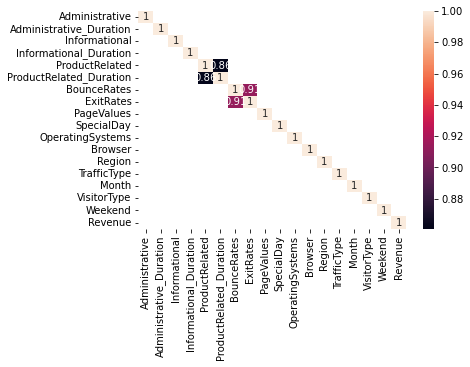

In [19]:
sns.heatmap(scaled.corr()[abs(scaled.corr())>0.8],annot=True)

### Checking the need for PCA

In [20]:
x=scaled.drop(["Revenue"],axis=1)

cov_matrix=np.cov(x.T)
eigenval,eigen_vector=np.linalg.eig(cov_matrix)

eigenval=eigenval/sum(eigenval)*100
print(eigenval)

## find the cummulative sum
cum_sum=np.cumsum(eigenval)
cum_sum

[9.87731753e+01 7.54394111e-01 4.48199085e-01 1.37709819e-02
 9.21341541e-03 4.42875310e-04 3.55262046e-04 1.63093318e-04
 1.55191031e-04 7.77004147e-05 2.36299606e-05 2.02394684e-05
 4.81263605e-06 3.21753670e-06 1.00082922e-06 1.02957810e-07
 4.90198480e-09]


array([ 98.77317528,  99.52756939,  99.97576847,  99.98953945,
        99.99875287,  99.99919574,  99.99955101,  99.9997141 ,
        99.99986929,  99.99994699,  99.99997062,  99.99999086,
        99.99999567,  99.99999889,  99.99999989, 100.        ,
       100.        ])

### Agglomorative Clustering

#### finding optimal k values

In [21]:
# ## Linkage matrix

# from scipy.cluster.hierarchy import linkage
# link_mat = linkage(x, method = 'ward')     
# ### print first 10 observations of the linkage matrix 'link_mat'
# print(link_mat[0:10])

# ### Denadrogram
# from scipy.cluster.hierarchy import dendrogram
# dendro = dendrogram(link_mat)

#### clustering

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')
clusters.fit(x)
x['Cluster'] = clusters.labels_
x.head()

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931        0.286512                -0.624348   
1               -0.244931        1.286512                63.375652   
2               -0.244931        0.286512                -0.624348   
3               -0.244931        1.286512                 2.042319   
4               -0.244931        9.286512               626.875652   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems   Browser  \
0    -0.257683  -0.686371   -0.317178   -0.308821         -1.330774 -0.372634   
1    -0.457683  -0.786371   -0.317178   -0.308821         -0.330774  0.627366   
2    -0.257683  -0.686371   -0.317178   -0.308821          1.669226 -0.372634   
3    -0.407683  -0.746371   -0.317178   -0.308821          0.669226  0.627366   
4    -0.437683  -0.836371   -0.317178   -0.308821          0.669226  1.627366   

     Region  TrafficType  Month  VisitorType  Weekend  Cluster  
0 -0.310586    -0.011076      2            1        0        1  
1 -0.310586     0.988924      2            1        0        1  
2  7.689414     1.988924      2            1        0        1  
3  0.689414     2.988924      2            1        0        1  
4 -0.310586     2.988924      2            1        1        1

#### optimizing the clusters

In [24]:
x.Cluster.value_counts()

1    11385
0      945
Name: Cluster, dtype: int64

In [25]:
x['Cluster'] = x.Cluster.replace({0:1, 1:0})

In [26]:

x.Cluster.value_counts()

0    11385
1      945
Name: Cluster, dtype: int64

### Comparing the clusters with predefault given target "Revenue"

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

In [28]:
y_pred = x['Cluster']
y_test = scaled.Revenue

In [29]:
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: uint8

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy Score: 0.8151662611516626
Precission Score: 0.3037037037037037
percentage mislabbled: 18.48337388483374
total ones: 1908
Number of Mislabbled Ones: 1621
total zeroes: 10422
Number of Mislabbled zeroes: 658
Recall Score: 0.15041928721174005
F1-Score: 0.20119172800560817


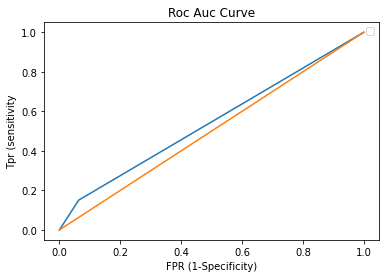

---------------------------------------------------------------------------------------------------- 



In [30]:
percent_mislabbled = (((y_test != y_pred).sum())/y_test.shape[0])*100


y_pred_df = pd.DataFrame(np.array(y_pred), columns= ['ypred'])
y_test_df = pd.DataFrame(y_test.values, columns = ['y_test'])
df_test = pd.concat([y_pred_df, y_test_df], axis=1)

df_test1 = df_test[df_test['y_test'] == 1]
df_test0 = df_test[df_test['y_test'] == 0]


total_ones = len(df_test[df_test['y_test'] == 1])
number_of_mislabbled_ones = (df_test1.y_test != df_test1.ypred).sum()

total_zeroes = len(df_test[df_test['y_test'] == 0])
number_of_mislabbled_zeroes = (df_test0.y_test != df_test0.ypred).sum()
    



print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Precission Score: {precision_score(y_test,y_pred)}')
print(f'percentage mislabbled: {percent_mislabbled}')
print(f'total ones: {total_ones}')
print(f'Number of Mislabbled Ones: {number_of_mislabbled_ones}')
print(f'total zeroes: {total_zeroes}')
print(f'Number of Mislabbled zeroes: {number_of_mislabbled_zeroes}')   
print(f'Recall Score: {recall_score(y_test,y_pred)}')
print(f'F1-Score: {f1_score(y_test,y_pred)}')
from sklearn.metrics import roc_curve

fpr, tpr, th = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([1,0], [1, 0])
plt.xlabel('FPR (1-Specificity)')
plt.ylabel('Tpr (sensitivity')
plt.title('Roc Auc Curve')
plt.legend()
plt.show()


print('-'*100, '\n')

### Trying K-means Clustering

In [31]:
scaled.head()

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931        0.286512                -0.624348   
1               -0.244931        1.286512                63.375652   
2               -0.244931        0.286512                -0.624348   
3               -0.244931        1.286512                 2.042319   
4               -0.244931        9.286512               626.875652   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems   Browser  \
0    -0.257683  -0.686371   -0.317178   -0.308821         -1.330774 -0.372634   
1    -0.457683  -0.786371   -0.317178   -0.308821         -0.330774  0.627366   
2    -0.257683  -0.686371   -0.317178   -0.308821          1.669226 -0.372634   
3    -0.407683  -0.746371   -0.317178   -0.308821          0.669226  0.627366   
4    -0.437683  -0.836371   -0.317178   -0.308821          0.669226  1.627366   

     Region  TrafficType  Month  VisitorType  Weekend  Revenue  
0 -0.310586    -0.011076      2            1        0        0  
1 -0.310586     0.988924      2            1        0        0  
2  7.689414     1.988924      2            1        0        0  
3  0.689414     2.988924      2            1        0        0  
4 -0.310586     2.988924      2            1        1        0

In [32]:
scaled_km = scaled.drop('Revenue', axis=1)

In [33]:
from sklearn.cluster import KMeans

In [34]:
## build a K-Means model with 2 clusters
new_clusters = KMeans(n_clusters = 2, random_state = 10)
## fit the model
new_clusters.fit(scaled_km)
## append the cluster label for each point in the dataframe 'df_cust'
scaled_km['Cluster'] = new_clusters.labels_

In [35]:
y_pred = scaled_km['Cluster']
y_test = scaled.Revenue

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy Score: 0.8154906731549068
Precission Score: 0.3033226152197213
percentage mislabbled: 18.45093268450933
total ones: 1908
Number of Mislabbled Ones: 1625
total zeroes: 10422
Number of Mislabbled zeroes: 650
Recall Score: 0.14832285115303984
F1-Score: 0.19922562478000705


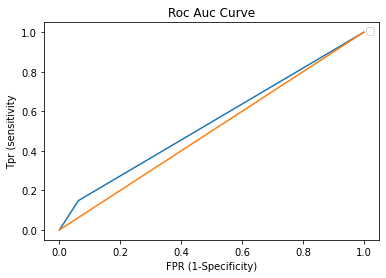

---------------------------------------------------------------------------------------------------- 



In [36]:
percent_mislabbled = (((y_test != y_pred).sum())/y_test.shape[0])*100


y_pred_df = pd.DataFrame(np.array(y_pred), columns= ['ypred'])
y_test_df = pd.DataFrame(y_test.values, columns = ['y_test'])
df_test = pd.concat([y_pred_df, y_test_df], axis=1)

df_test1 = df_test[df_test['y_test'] == 1]
df_test0 = df_test[df_test['y_test'] == 0]


total_ones = len(df_test[df_test['y_test'] == 1])
number_of_mislabbled_ones = (df_test1.y_test != df_test1.ypred).sum()

total_zeroes = len(df_test[df_test['y_test'] == 0])
number_of_mislabbled_zeroes = (df_test0.y_test != df_test0.ypred).sum()
    



print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Precission Score: {precision_score(y_test,y_pred)}')
print(f'percentage mislabbled: {percent_mislabbled}')
print(f'total ones: {total_ones}')
print(f'Number of Mislabbled Ones: {number_of_mislabbled_ones}')
print(f'total zeroes: {total_zeroes}')
print(f'Number of Mislabbled zeroes: {number_of_mislabbled_zeroes}')   
print(f'Recall Score: {recall_score(y_test,y_pred)}')
print(f'F1-Score: {f1_score(y_test,y_pred)}')
from sklearn.metrics import roc_curve

fpr, tpr, th = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([1,0], [1, 0])
plt.xlabel('FPR (1-Specificity)')
plt.ylabel('Tpr (sensitivity')
plt.title('Roc Auc Curve')
plt.legend()
plt.show()


print('-'*100, '\n')

percentage mislabbled: 18.45093268450933

total ones: 1908

Number of Mislabbled Ones: 1625

total zeroes: 10422

Number of Mislabbled zeroes: 650

In [37]:
scaled_km.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month',
       'VisitorType', 'Weekend', 'Cluster'],
      dtype='object')

In [42]:
scaled_km.head()

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931        0.286512                -0.624348   
1               -0.244931        1.286512                63.375652   
2               -0.244931        0.286512                -0.624348   
3               -0.244931        1.286512                 2.042319   
4               -0.244931        9.286512               626.875652   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems   Browser  \
0    -0.257683  -0.686371   -0.317178   -0.308821         -1.330774 -0.372634   
1    -0.457683  -0.786371   -0.317178   -0.308821         -0.330774  0.627366   
2    -0.257683  -0.686371   -0.317178   -0.308821          1.669226 -0.372634   
3    -0.407683  -0.746371   -0.317178   -0.308821          0.669226  0.627366   
4    -0.437683  -0.836371   -0.317178   -0.308821          0.669226  1.627366   

     Region  TrafficType  Month  VisitorType  Weekend  Cluster  
0 -0.310586    -0.011076      2            1        0        0  
1 -0.310586     0.988924      2            1        0        0  
2  7.689414     1.988924      2            1        0        0  
3  0.689414     2.988924      2            1        0        0  
4 -0.310586     2.988924      2            1        1        0

In [41]:
import plotly.express as px
fig = px.scatter(scaled_km, x='Administrative', y='Administrative_Duration',
              color='Cluster')
fig.show()

In [43]:
import plotly.express as px
fig = px.scatter(scaled_km, x='Informational', y='Informational_Duration',
              color='Cluster')
fig.show()

In [44]:
import plotly.express as px
fig = px.scatter(scaled_km, x='ProductRelated', y='ProductRelated_Duration',
              color='Cluster')
fig.show()

In [45]:
scaled_km.head(0)

Empty DataFrame
Columns: [Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay, OperatingSystems, Browser, Region, TrafficType, Month, VisitorType, Weekend, Cluster]
Index: []

In [48]:
import plotly.express as px
fig = px.scatter(scaled_km, x='BounceRates', y='ExitRates', color='Cluster')
fig.show()